In [1]:
import sys
sys.path.append('../../../')
import helper

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, w):
    return_value = np.sin(w[0] * x ) + w[1]
    return return_value

def mse_loss(dataset_X, dataset_Y, w, f):
    y_pred = f(dataset_X, w)
    mse = np.mean((dataset_Y - y_pred) ** 2)
    return mse

In [3]:
dataset_filename = helper.get_filenames_datasets()["1"] 
weights = np.array([2, 3], dtype=float)
X, Y, datasets = helper.load_datasets(dataset_filename)

dataset_X = datasets[0][:, 0]
dataset_Y = datasets[0][:, 1]

In [4]:
def simple_mse(x, y):
    return mse_loss(dataset_X, dataset_Y, np.array([x, y], dtype=float), f)

vectorized_func = np.vectorize(simple_mse)

In [5]:
w0 = weights[0]
w1 = weights[1]
z = mse_loss(dataset_X, dataset_Y, [w0, w1], f)

print(w0, w1, z)

2.0 3.0 10.72005882240961


In [6]:
def view_dataset_mse_3d(elev=30, azim=45):
    plt.style.use('fivethirtyeight')

    # Создаем трехмерную фигуру и оси
    fig = plt.figure(figsize=(16,16))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(init_X, init_Y, init_Z, cmap='inferno', edgecolor='none')

    ax.plot(w0, w1, z, 'go', label='Начальная точка')

    ax.view_init(elev=elev, azim=azim) 

    # Настройка меток и заголовка
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('График функции mse')

    # Отображение графика
    plt.show()

In [7]:
def view_dataset_mse_2d():
    x_min = min(init_x)
    x_max = max(init_x)

    y_min = min(init_y)
    y_max = max(init_y)

    plt.imshow(init_Z, cmap='inferno', origin='lower', extent=[x_min, x_max, y_min, y_max])
    plt.colorbar()  # Добавление цветовой шкалы

    # plt.plot(w0, w1, color='red', marker='o', label='Point')
    plt.plot(w0, w1, 'go', label='Начальная точка')

    # Настройка осей и меток
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('График функции mse')

    # Отображение графика
    plt.show()

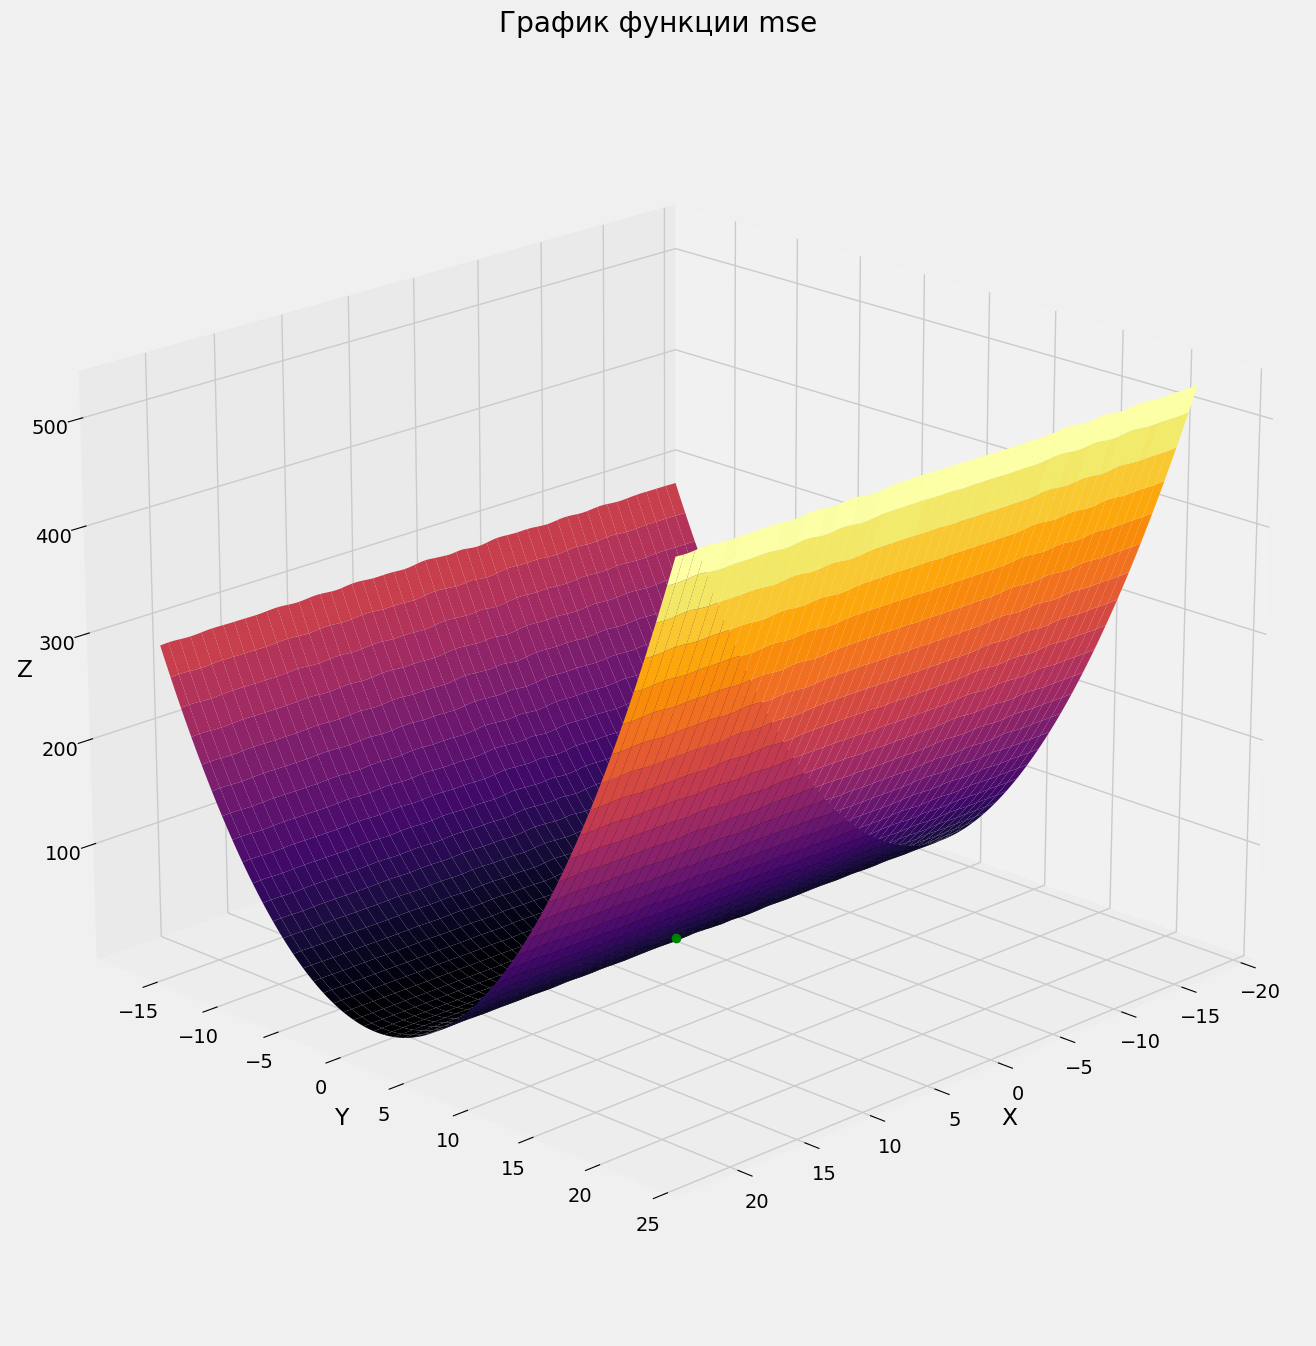

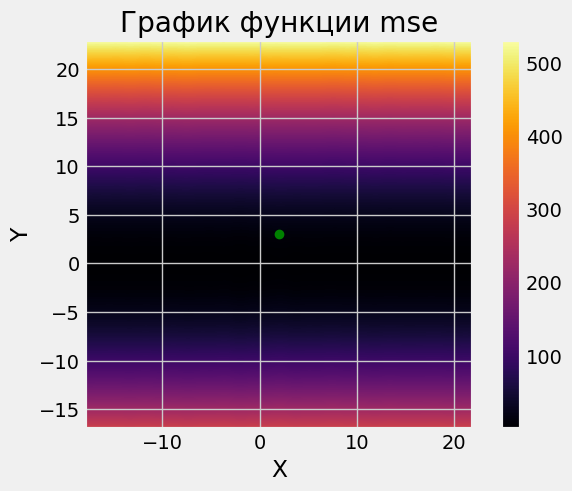

In [8]:
init_dist_x = 20
init_dist_y = 20
init_density_x = 200
init_density_y = 200

init_x = np.linspace(weights[0]-init_dist_x, weights[0]+init_dist_x, init_density_x)
init_y = np.linspace(weights[1]-init_dist_y, weights[1]+init_dist_y, init_density_y)
init_X, init_Y = np.meshgrid(init_x, init_y)
init_Z = vectorized_func(init_X, init_Y)

view_dataset_mse_3d(20, 45)
view_dataset_mse_2d()

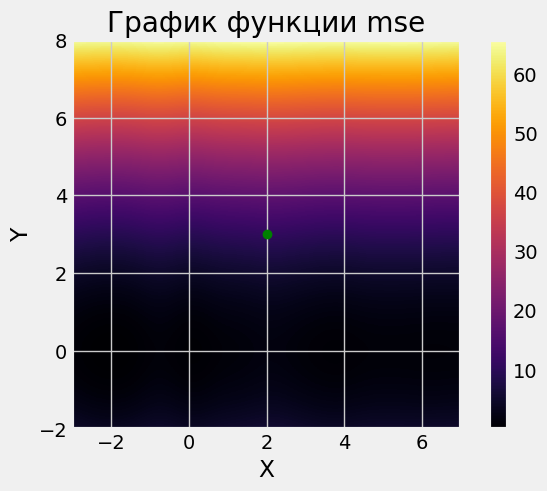

In [9]:
init_dist_x = 5
init_dist_y = 5
init_density_x = 200
init_density_y = 200

init_x = np.linspace(weights[0]-init_dist_x, weights[0]+init_dist_x, init_density_x)
init_y = np.linspace(weights[1]-init_dist_y, weights[1]+init_dist_y, init_density_y)
init_X, init_Y = np.meshgrid(init_x, init_y)
init_Z = vectorized_func(init_X, init_Y)

view_dataset_mse_2d()

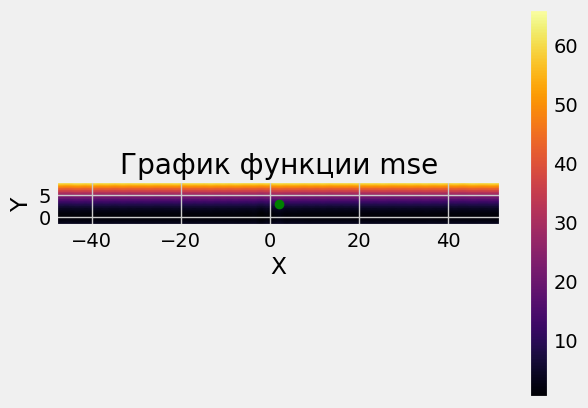

In [10]:
init_dist_x = 50
init_dist_y = 5
init_density_x = 200
init_density_y = 20

init_x = np.linspace(weights[0]-init_dist_x, weights[0]+init_dist_x, init_density_x)
init_y = np.linspace(weights[1]-init_dist_y, weights[1]+init_dist_y, init_density_y)
init_X, init_Y = np.meshgrid(init_x, init_y)
init_Z = vectorized_func(init_X, init_Y)

view_dataset_mse_2d()